Plottum training niðurstöður

In [15]:
import pandas as pd
import numpy as np
import os

In [16]:
def load_file(agent_number):
    os.chdir("/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/AgentV2/training_results/logs")
    try:
        df = pd.read_csv("reward_log_agent" + str(agent_number) + ".csv")
        print(df.head())
        return df
    except FileNotFoundError:
        print(f"Agent log {agent_number} not found.")
        return None


In [17]:
log_nbr = "402"
df = load_file(log_nbr)

   Episode    Reward
0        1  0.981286
1        2  0.730114
2        3  1.493347
3        4  1.439866
4        5  1.498358


In [18]:
print(len(df))

30000


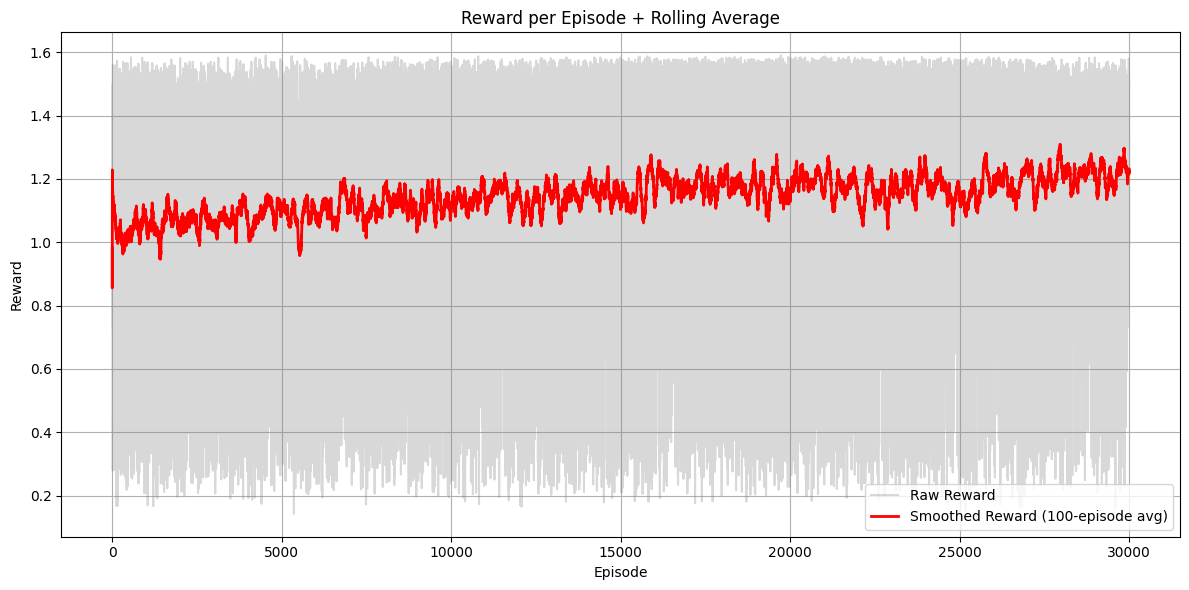

In [19]:
import matplotlib.pyplot as plt

# Remove zero rewards
df_clean = df[df['Reward'] != 0].copy()

# Compute rolling average on the cleaned data
df_clean['Smoothed'] = df_clean['Reward'].rolling(window=100, min_periods=1).mean()

plt.figure(figsize=(12, 6))

# Faint line plot for raw rewards
plt.plot(df_clean['Episode'], df_clean['Reward'], label='Raw Reward', color='gray', alpha=0.3)

# Rolling average line in red
plt.plot(df_clean['Episode'], df_clean['Smoothed'], label='Smoothed Reward (100-episode avg)', color='red', linewidth=2)

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward per Episode + Rolling Average')
plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.ylim(0.4,1.5)


plt.show()
